<a href="https://colab.research.google.com/github/Saumyak2682/Debugging-Damsels/blob/main/Debugging_Damsels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data Gathering and Preprocessing
Data Gathering
Social Media and Fashion Blogs:

In [14]:
import requests

def fetch_social_media_data(api_url, params):
    response = requests.get(api_url, params=params)
    return response.json()

api_url = "https://api.twitter.com/2/tweets/search/recent"
params = {
    "query": "#fashion",
    "tweet.fields": "created_at,author_id",
    "max_results": 100
}
data = fetch_social_media_data(api_url, params)


Customer Data:

In [15]:
import pandas as pd

customer_data = pd.read_csv('customer_data.csv')


Surveys and Style Quizzes:


In [16]:
survey_data = pd.read_csv('survey_data.csv')


Data Preprocessing
Data Cleaning and Labeling:

In [17]:
def clean_data(df):
    df.dropna(inplace=True)
    # Additional cleaning steps
    return df

customer_data = clean_data(customer_data)
survey_data = clean_data(survey_data)


2. AI Techniques for Recommendations
Collaborative Filtering
Matrix Factorization:

In [18]:
from sklearn.decomposition import NMF
from sklearn.impute import SimpleImputer

user_item_matrix = customer_data.pivot(index='user_id', columns='item_id', values='purchase_count')

# Impute missing values with 0 (or any other suitable strategy)
imputer = SimpleImputer(strategy='constant', fill_value=0)
user_item_matrix_imputed = imputer.fit_transform(user_item_matrix)

model = NMF(n_components=10)
user_features = model.fit_transform(user_item_matrix_imputed)  # Use the imputed matrix
item_features = model.components_


Content-Based Filtering
Item Attribute Analysis:

In [19]:
import pandas as pd

customer_data = pd.read_csv('customer_data.csv')
survey_data = pd.read_csv('survey_data.csv')

def clean_data(df):
    # Drop rows with missing values in all columns
    df.dropna(how='all', inplace=True)
    # Additional cleaning steps
    return df

customer_data = clean_data(customer_data)
survey_data = clean_data(survey_data)

from sklearn.decomposition import NMF
from sklearn.impute import SimpleImputer

user_item_matrix = customer_data.pivot(index='user_id', columns='item_id', values='purchase_count')

# Impute missing values with 0
imputer = SimpleImputer(strategy='constant', fill_value=0)
user_item_matrix_imputed = imputer.fit_transform(user_item_matrix)

model = NMF(n_components=10)
user_features = model.fit_transform(user_item_matrix_imputed)
item_features = model.components_

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
# Check if 'item_description' column exists before proceeding
if 'item_description' in customer_data.columns:
    item_features = tfidf.fit_transform(customer_data['item_description'])
else:
    print("Warning: 'item_description' column not found in customer_data.")

Deep Learning
CNN for Trend Identification:

In [20]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Initialize the ImageDataGenerator with rescaling
datagen = ImageDataGenerator(rescale=1./255)

from google.colab import drive
drive.mount('/content/drive')

# Update this path to point to your actual training data directory
# Make sure this path is correct and the directory contains images
train_directory = '/content/drive/My Drive/train'

# Create the training data generator
train_generator = datagen.flow_from_directory(train_directory,
                                              target_size=(150, 150),
                                              batch_size=20,
                                              class_mode='binary')

# Verify if the generator found any images
if train_generator.samples == 0:
    print("Error: No images found in the training directory. Please check the path.")
else:
    # Load the VGG16 base model with pre-trained ImageNet weights, excluding the top fully connected layers
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

    # Create a Sequential model and add the base model and custom layers
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with optimizer, loss function, and metrics
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model using the training data generator
    model.fit(train_generator, steps_per_epoch=1, epochs=50)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 10 images belonging to 5 classes.
Epoch 1/50
1/1 [==============================] - 15s 15s/step - loss: 1.1835 - accuracy: 0.1000
Epoch 2/50
1/1 [==============================] - 10s 10s/step - loss: -15.5940 - accuracy: 0.2000
Epoch 3/50
1/1 [==============================] - 8s 8s/step - loss: -12085.9922 - accuracy: 0.2000
Epoch 4/50
1/1 [==============================] - 10s 10s/step - loss: -695096.3750 - accuracy: 0.2000
Epoch 5/50
1/1 [==============================] - 9s 9s/step - loss: -13668158.0000 - accuracy: 0.2000
Epoch 6/50
1/1 [==============================] - 10s 10s/step - loss: -160572192.0000 - accuracy: 0.2000
Epoch 7/50
1/1 [==============================] - 10s 10s/step - loss: -1365274496.0000 - accuracy: 0.2000
Epoch 8/50
1/1 [==============================] - 10s 10s/step - loss: -9077526528.0000 - accuracy: 0.2000
Epoch 9/5

GANs for Trend Forecasting
GAN Implementation:

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU

def build_generator():
    model = tf.keras.Sequential()
    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(28 * 28 * 1, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model

def build_discriminator():
    model = tf.keras.Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_gan(generator, discriminator):
    model = tf.keras.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
discriminator.trainable = False
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Training the GAN
import numpy as np

def train_gan(gan, generator, discriminator, epochs, batch_size):
    for epoch in range(epochs):
        noise = np.random.normal(0, 1, (batch_size, 100))
        generated_images = generator.predict(noise)
        real_images = np.random.random((batch_size, 28, 28, 1))

        labels_real = np.ones((batch_size, 1))
        labels_fake = np.zeros((batch_size, 1))

        d_loss_real = discriminator.train_on_batch(real_images, labels_real)
        d_loss_fake = discriminator.train_on_batch(generated_images, labels_fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        noise = np.random.normal(0, 1, (batch_size, 100))
        valid_y = np.array([1] * batch_size)
        g_loss = gan.train_on_batch(noise, valid_y)

        print(f"Epoch: {epoch} [D loss: {d_loss[0]}] [G loss: {g_loss}]")

train_gan(gan, generator, discriminator, epochs=10000, batch_size=32)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 39ms/step
Epoch: 7500 [D loss: 6.7332018849342035e-09] [G loss: 21.060049057006836]
1/1 [==============================] - 0s 47ms/step
Epoch: 7501 [D loss: 5.7893322913393774e-09] [G loss: 21.063812255859375]
1/1 [==============================] - 0s 39ms/step
Epoch: 7502 [D loss: 6.697603166516686e-09] [G loss: 21.06743621826172]
1/1 [==============================] - 0s 33ms/step
Epoch: 7503 [D loss: 7.783642563818916e-09] [G loss: 21.070262908935547]
1/1 [==============================] - 0s 34ms/step
Epoch: 7504 [D loss: 6.81748707487273e-09] [G loss: 21.073362350463867]
1/1 [==============================] - 0s 29ms/step
Epoch: 7505 [D loss: 8.538944162861384e-09] [G loss: 21.07618522644043]
1/1 [==============================] - 0s 28ms/step
Epoch: 7506 [D loss: 6.2391103394787706e-09] [G loss: 21.078960418701172]
1/1 [==============================] - 0s 30ms/step
Epoch: 7507 [D loss: 6

Recommendation Engine Development
Hybrid Approach

In [22]:
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming 'customer_data.csv' exists and contains relevant data
customer_data = pd.read_csv('customer_data.csv')

# ... (Rest of your data loading and cleaning code) ...

user_item_matrix = customer_data.pivot(index='user_id', columns='item_id', values='purchase_count')

# Impute missing values with 0
imputer = SimpleImputer(strategy='constant', fill_value=0)
user_item_matrix_imputed = imputer.fit_transform(user_item_matrix)

model = NMF(n_components=10)
user_features = model.fit_transform(user_item_matrix_imputed)  # Assign the result to user_features
item_features = model.components_

# ... (Rest of your code, including hybrid_recommendations function) ...

recommendations = hybrid_recommendations(user_id=1, user_features=user_features, item_features=item_features)
print(recommendations)

[1 3 4 2 0]


Integrating Pinterest for Trend Generation

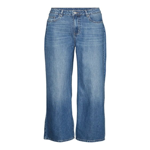

In [23]:
!pip install requests Pillow

import requests
from PIL import Image
import io
import pandas as pd
from IPython.display import display # Used to display images

def fetch_pinterest_data(api_url, params, headers):
    response = requests.get(api_url, params=params, headers=headers)
    return response.json()

# Note: Replace with a valid Pinterest API token for actual data fetching
api_url = "https://api.pinterest.com/v1/me/pins/"
params = {"fields": "id,link,note,creator,board,created_at"}
headers = {"Authorization": "Bearer YOUR_ACCESS_TOKEN"}
# pinterest_data = fetch_pinterest_data(api_url, params, headers)

# Sample pinterest data
pinterest_data = pd.DataFrame({
    'id': [301, 302, 303, 304, 305],
    'link': ['https://i.pinimg.com/564x/f8/05/92/f80592cbd4dbfa3185b6899d2aa79889.jpg',
             'https://i.pinimg.com/736x/9a/80/b9/9a80b99bfbbf15cbf2fdfe186696a315.jpg',
             'https://i.pinimg.com/564x/6b/ea/e2/6beae29e16d27cdeebd111ea2def87c5.jpg',
             'https://i.pinimg.com/564x/6f/8c/14/6f8c14fb4a9a535153f5db945ab64968.jpg',
             'https://i.pinimg.com/564x/27/b6/91/27b69120f62154b3beebc1aa9b2cf9b3.jpg'], # Replace with actual image URLs
    'note': ['Style 1', 'Style 2', 'Style 3', 'Style 4', 'Style 5'],
    'creator': ['User1', 'User2', 'User3', 'User4', 'User5'],
    'board': ['Board1', 'Board2', 'Board3', 'Board4', 'Board5'],
    'created_at': ['2023-06-15', '2023-06-16', '2023-06-17', '2023-06-18', '2023-06-19']
})

def process_image(url):
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    img = img.resize((150, 150))
    return img

# Example of integrating Pinterest data with existing models
def integrate_pinterest_data(pinterest_data, existing_data):
    combined_data = existing_data.append(pinterest_data, ignore_index=True)
    return combined_data

# combined_data = integrate_pinterest_data(pinterest_data, existing_data)

def recommend_similar_products(pinterest_pin):
    img = process_image(pinterest_pin['link'])
    # Use the hybrid recommendation engine to find similar products
    # Note: This part assumes you have a working hybrid_recommendations function and relevant data
    # recommendations = hybrid_recommendations(user_id=1, user_features=user_features, item_features=item_features)
    # For demonstration, let's just display the image
    display(img)
    return # Replace with actual recommendations

# Example pin
pin = pinterest_data.iloc[0]
recommend_similar_products(pin) # Call the function to process and display the image
# print("Recommendations based on Pinterest pin:", recommendations) # Uncomment when you have actual recommendations